# **Praktikum 03** - TI08 Selasa Pagi

Rika Rahma - 0110222134

# 3.1 Model Regresi Sederhana

1. Membaca data file CSV

In [2]:
# Menghubungkan colab dengan Google Drive
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Memanggil dataset lewat Gdrive
path = '/content/gdrive/MyDrive/Praktikum_ML/praktikum03/data/'

In [4]:
# Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + 'socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


2. Melihat informasi umum pada data

In [5]:
# Mencari informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


3. Menghitung statistik deskriptif pada kolom numeric dengan describe

In [6]:
# Menghitung statistik deskriptif pada kolom numeric dengan describe
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


4. Data Pre-processing

In [7]:
# Data Pre-processing
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,    # in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.453592,   # lb -> kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


5. Membagi dataset untuk Training dan Test

In [8]:
# Membagi dataset untuk Training dan Test
from sklearn.model_selection import train_test_split

x = df1[["tinggi_cm"]]
y = df1["berat_kg"]
x_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

6. Training Model

In [10]:
# Training Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

7. Evaluasi Model

In [12]:
# Evaluasi Model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2'] = [r2]
df_resume['Koefisien (kg/cm)'] = [model.coef_[0]]
df_resume['Intersep (kg)'] = [model.intercept_]
df_resume['R2 (test)'] = [r2]
df_resume['Mae(kg)'] = [mean_absolute_error(y_test, y_pred)]
mse = mean_squared_error(y_test, y_pred) #default squared=True
rmse = np.sqrt(mse)
df_resume['MSE (kg)'] = [mse]
df_resume['RMSE (kg)'] = [rmse]

# Display the DataFrame
display(df_resume)

,R2,Koefisien (kg/cm),Intersep (kg),R2 (test),Mae(kg),MSE (kg),RMSE (kg)
0,0.260575,0.548451,-37.073386,0.260575,3.644507,21.086814,4.592038


8. Persamaan Regresi

In [13]:
# Persamaan Regresi
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * X + {intercept:.3f}")

Persamaan: y = 0.548 * X + -37.073


9. Plot Regresi

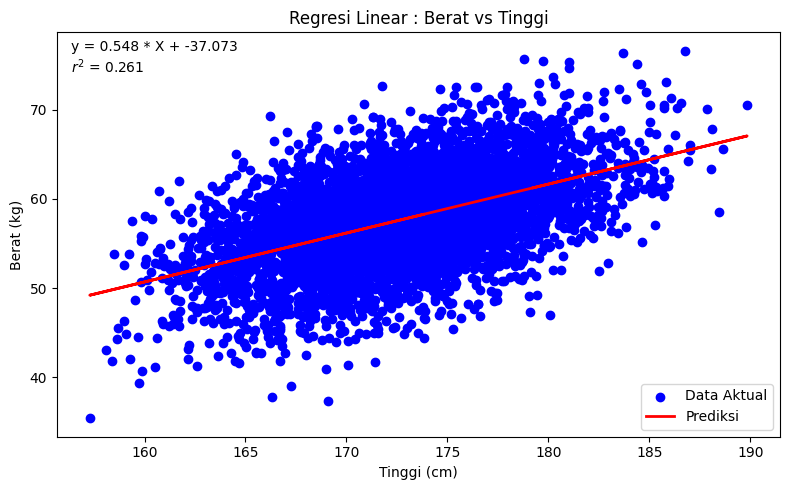

In [14]:
# Plot Regresi
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')

# Garis regresi
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi')

# Menambahkan label dan judul
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.title('Regresi Linear : Berat vs Tinggi')
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * X + {intercept:.3f}\n$r^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [15]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    'Tinggi (cm)': X_test["tinggi_cm"].to_numpy(),
    'Berat Aktual (kg)': y_test.to_numpy(),
    'Berat Prediksi (kg)': y_pred_test,

  })

# 1) Selisih error (positif = overpredict)
hasil["Selisih Error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (kg)"].abs() / denom)).clip(lower=0, upper=1)

hasil

,Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih Error (kg),Akurasi (%)
0,173.80,60.91,58.247446,-2.662554,0.956287
1,172.46,50.79,57.512521,6.722521,0.867641
2,171.85,61.68,57.177966,-4.502034,0.927010
3,175.29,57.33,59.064638,1.734638,0.969743
4,175.29,45.44,59.064638,13.624638,0.700162
...,...,...,...,...,...
4995,175.10,62.64,58.960432,-3.679568,0.941258
4996,170.90,47.72,56.656937,8.936937,0.812721
4997,174.17,64.04,58.450373,-5.589627,0.912717
4998,170.42,58.75,56.393680,-2.356320,0.959892


# 3.2 Multiple Linear Regresi

1. Membaca data file CSV

In [16]:
# Membaca data file CSV
import pandas as pd

# Read the CSV file with a comma delimeter
df = pd.read_csv(path + 'stunting_wasting_dataset.csv', sep=',')

# Cetak header data (5 baris data) dari file
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


2. Menghitung statistik deskriptif pada kolom numeric dengan describe

In [17]:
# Menghitung statistik deskriptif pada kolom numeric dengan describe
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


3. Data Pre-processing

In [20]:
# Data Pre-Processing
df_st1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin": "jk",
                        "Umur (bulan)": "umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm",
                        "Berat Badan (kg)": "berat_kg"})
       .copy())

## Laki-laki: 1, Perempuan: 0
df_st1["jk"] = df_st1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df_st1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


4. Analisis Korelasi

In [22]:
# Hitung matriks korelasi
corr_matrix = df_st1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


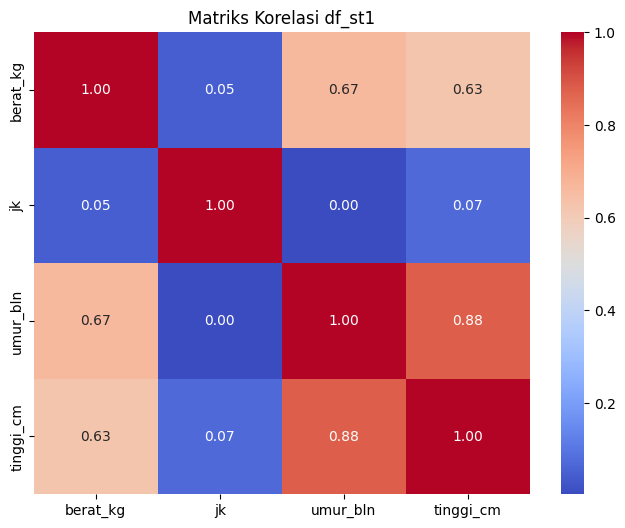

In [23]:
# Buat Heatmap Grafik
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df_st1")
plt.show()

5. Membagi dataset untuk Training dan Test

In [24]:
# Membagi dataset untuk Training dan Test
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df_st1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df_st1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

# Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

# Cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


6. Pemodelan

In [25]:
# Cek apakah data training telah memiliki nilai konstan
# Tambahkan konstanta
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [26]:
# Melakukan pemodelan dengan Pustaka program OLS
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('----------------------------')
print(model.params)
print('----------------------------')

const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

# Print persamaan regresi
print(f"y = {const:.3f} + ({x1_umur:.3f})*x1 + ({x2_tinggi:.3f})*x2")

----------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
----------------------------
y = 2.546 + (0.230)*x1 + (0.054)*x2


In [27]:
# Cetak informasi model regresi OLS
# Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:47:01   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

8. Pengujian model dengan data testing

In [ ]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil